In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Funções auxiliares

In [20]:
# Adiciona ruído gaussiano a um sinal de entrada,
# mais especificamente, uma lista de posições (x, y)
# que formam um caminho no plano cartesiano
def add_noise(signal, std=0.1):

  signal_with_noise = []

  for x, y in signal:
    # O desvio padrão do ruído
    # determina quão ruidoso será o sinal de saída
    x += np.random.randn(1)*std
    y += np.random.randn(1)*std

    signal_with_noise.append([x, y])

  return np.array(signal_with_noise)[:, :, 0]

# Implementação alternativa da mesma função
def add_noise2(signal, std=0.1):

  signal_with_noise = np.array([[0.0, 0.0]])

  for x, y in signal:
    x += np.random.randn(1)*std
    y += np.random.randn(1)*std

    signal_with_noise = np.append(signal_with_noise, [[x[0], y[0]]], axis=0)

  signal_with_noise = np.delete(signal_with_noise, 0, axis=0)

  return np.array(signal_with_noise)

In [89]:
def add_gaussian_noise(pos, min_sigma=0.01, max_sigma=0.08, logger=False):
        field_center = [225, 150]
        upper_right_corner = [450, 300]

        dist_between_center_to_corner = np.sqrt(np.power(upper_right_corner[0] - field_center[0], 2) + np.power(upper_right_corner[1] - field_center[1], 2))
        dist_pos_to_center = np.sqrt(np.power(pos[0] - field_center[0], 2) + np.power(pos[1] - field_center[1], 2))

        k = dist_pos_to_center / dist_between_center_to_corner
        std = min_sigma + k * (max_sigma - min_sigma)
        noise1 = np.random.randn(1)*std
        noise2 = np.random.randn(1)*std

        pos_with_noise = np.array([pos[0] + noise1[0], pos[1] + noise2[0]])

        if logger:
            print(k, std, noise1, noise2)
            print(pos)

        return pos_with_noise

# pos = (225, 150)
# pos = (450, 300)
pos = np.array([367, 210])
min_sigma, max_sigma = 0.01, 0.08
print(add_gaussian_noise(pos, 0.01, 0.08, True))


0.5700682220381853 0.049904775542672974 [-0.01834634] [-0.03708672]
[367 210]
[366.98165366 209.96291328]


In [88]:
def apply_add_gaussian_noise(data, min_sigma=0.01, max_sigma=0.08):
    data_with_noise = np.array([[0.0, 0.0]])

    for pos in data:
        pos_with_noise = add_gaussian_noise(pos, min_sigma, max_sigma)

        data_with_noise = np.append(data_with_noise, [[pos_with_noise[0], pos_with_noise[1]]], axis=0)

    data_with_noise = np.delete(data_with_noise, 0, axis=0)

    return np.array(data_with_noise)

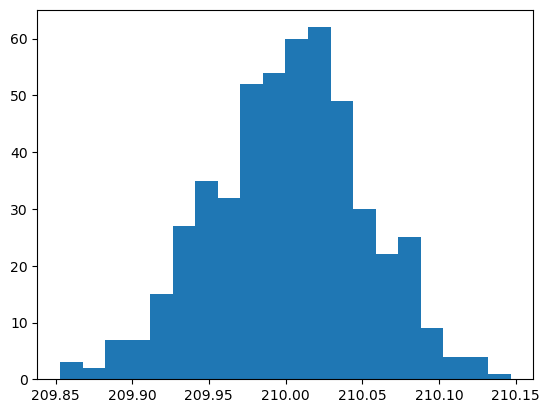

In [91]:
data = np.array([[367, 210]] * 500)
data_with_noise = apply_add_gaussian_noise(data, 0.01, 0.08)

_ = plt.hist(data_with_noise[:, 1], bins=20)

In [21]:
# Calcula a diferencial dos pontos em relação ao tempo,
# e.g., posição -> velocidade
def get_dif(points, dt=1/60):

    dif = []

    for i in range(points.shape[0]-1):
        dX = (points[i+1, 0] - points[i, 0]) / dt
        dY = (points[i+1, 1] - points[i, 1]) / dt
        dif.append([dX, dY])

    return np.array(dif)

In [53]:
def plot_field_and_borders():
    plt.xlim(-10, 460)
    plt.ylim(-10, 310)
    plt.axhline(0, color='black', alpha=0.5)
    plt.axhline(300, color='black', alpha=0.5)
    plt.axvline(0, color='black', alpha=0.5)
    plt.axvline(225, color='black', alpha=0.5)
    plt.axvline(450, color='black', alpha=0.5)

def plot_robots_positions(robot_id, pos):
    plt.figure(figsize=(15, 10))
    plt.subplot(3, 3, 1)
    plt.title('Goleiro - campo')
    plt.plot(pos[robot_id == 0][:, 0], pos[robot_id == 0][:, 1], color='tab:blue')
    plot_field_and_borders()
    plt.subplot(3, 3, 2)
    plt.title('Goleiro - eixo x')
    plt.plot(pos[robot_id == 0][:, 0], color='tab:blue')
    plt.subplot(3, 3, 3)
    plt.title('Goleiro - eixo y')
    plt.plot(pos[robot_id == 0][:, 1], color='tab:blue')

    plt.subplot(3, 3, 4)
    plt.title('Zagueiro - campo')
    plt.plot(pos[robot_id == 1][:, 0], pos[robot_id == 1][:, 1], color='tab:orange')
    plot_field_and_borders()
    plt.subplot(3, 3, 5)
    plt.title('Zagueiro - eixo x')
    plt.plot(pos[robot_id == 1][:, 0], color='tab:orange')
    plt.subplot(3, 3, 6)
    plt.title('Zagueiro - eixo y')
    plt.plot(pos[robot_id == 1][:, 1], color='tab:orange')

    plt.subplot(3, 3, 7)
    plt.title('Atacante - campo')
    plt.plot(pos[robot_id == 2][:, 0], pos[robot_id == 2][:, 1], color='tab:green')
    plot_field_and_borders()
    plt.subplot(3, 3, 8)
    plt.title('Atacante - eixo x')
    plt.plot(pos[robot_id == 2][:, 0], color='tab:green')
    plt.subplot(3, 3, 9)
    plt.title('Atacante - eixo y')
    plt.plot(pos[robot_id == 2][:, 1], color='tab:green')

    plt.tight_layout()


In [ ]:
def set_labels(title=None, x=None, y=None):
    """ helps make code in book shorter. Optional set title, xlabel and ylabel
    """
    if x is not None:
        plt.xlabel(x)
    if y is not None:
        plt.ylabel(y)
    if title is not None:
        plt.title(title)

def plot_points(trace=None, measurements=None, filter=None, dt=1/60, which='nyy', equal_axes=False,
                title=None, x_label=None, y_label=None, fsize=(6, 6), color='blue'):

    t = np.linspace(0, measurements.shape[0]-1, measurements.shape[0]) * dt

    if which[0] == 'y':
      _ = plt.scatter(t, trace, c='black', marker='.', label='Track')
    if which[1] == 'y':
      _ = plt.scatter(t, measurements, facecolors='none', edgecolors='black', label='Measurements')
    if which[2] == 'y':
      _ = plt.plot(t, filter, c=color, label='Filter')
    _ = plt.legend()
    set_labels(title, x_label, y_label)
    if equal_axes:
      _ = plt.axis('equal')

def plot_data2(measurements, filtered, fsize=(15, 8)):

  measurements_dif = get_dif(measurements)

  plt.figure(figsize=fsize)

  plt.subplot(2, 2, 1)
  plot_points(None, measurements[:, 0], filtered[:, 0], 1, 'nyy', False,
              'Posição em x vs tempo',
              'contagem',
              'posição [cm]',
              (15, 5))

  plt.subplot(2, 2, 2)
  plot_points(None, measurements[:, 1], filtered[:, 1], 1, 'nyy', False,
              'Posição em y vs tempo',
              'contagem',
              'posição [cm]',
              (15, 5))

  plt.subplot(2, 2, 3)
  plot_points(None, measurements_dif[:, 0], filtered[1:, 2], 1, 'nyy', False,
              'Velocidade em x vs tempo',
              'contagem',
              'velocidade [cm/s]',
              (15, 5))

  plt.subplot(2, 2, 4)
  plot_points(None, measurements_dif[:, 1], filtered[1:, 3], 1, 'nyy', False,
              'Velocidade em y vs tempo',
              'contagem',
              'velocidade [cm/s]',
              (15, 5))

  plt.tight_layout()

def plot_data3(robot_id, measurements, filtered, fsize=(13, 20)):

  measurements0 = measurements[robot_id == 0]
  measurements1 = measurements[robot_id == 1]
  measurements2 = measurements[robot_id == 2]
  measurements_dif0 = get_dif(measurements0)
  measurements_dif1 = get_dif(measurements1)
  measurements_dif2 = get_dif(measurements2)

  plt.figure(figsize=fsize)

  plt.subplot(6, 2, 1)
  plot_points(None, measurements0[:, 0], filtered[robot_id == 0][:, 0], 1, 'nyy', False,
              'Goleiro - posição em x',
              'contagem',
              'posição [cm]',
              (15, 5))

  plt.subplot(6, 2, 2)
  plot_points(None, measurements0[:, 1], filtered[robot_id == 0][:, 1], 1, 'nyy', False,
              'Goleiro - posição em y',
              'contagem',
              'posição [cm]',
              (15, 5))

  plt.subplot(6, 2, 3)
  plot_points(None, measurements_dif0[:, 0], filtered[robot_id == 0][1:, 2], 1, 'nyy', False,
              'Goleiro - velocidade em x',
              'contagem',
              'velocidade [cm/s]',
              (15, 5))

  plt.subplot(6, 2, 4)
  plot_points(None, measurements_dif0[:, 1], filtered[robot_id == 0][1:, 3], 1, 'nyy', False,
              'Goleiro - velocidade em y',
              'contagem',
              'velocidade [cm/s]',
              (15, 5))
  
  plt.subplot(6, 2, 5)
  plot_points(None, measurements1[:, 0], filtered[robot_id == 1][:, 0], 1, 'nyy', False,
              'Zagueiro - posição em x',
              'contagem',
              'posição [cm]',
              (15, 5),
              'green')

  plt.subplot(6, 2, 6)
  plot_points(None, measurements1[:, 1], filtered[robot_id == 1][:, 1], 1, 'nyy', False,
              'Zagueiro - posição em y',
              'contagem',
              'posição [cm]',
              (15, 5),
              'green')

  plt.subplot(6, 2, 7)
  plot_points(None, measurements_dif1[:, 0], filtered[robot_id == 1][1:, 2], 1, 'nyy', False,
              'Zagueiro - velocidade em x',
              'contagem',
              'velocidade [cm/s]',
              (15, 5),
              'green')

  plt.subplot(6, 2, 8)
  plot_points(None, measurements_dif1[:, 1], filtered[robot_id == 1][1:, 3], 1, 'nyy', False,
              'Zagueiro - velocidade em y',
              'contagem',
              'velocidade [cm/s]',
              (15, 5),
              'green')
  
  plt.subplot(6, 2, 9)
  plot_points(None, measurements2[:, 0], filtered[robot_id == 2][:, 0], 1, 'nyy', False,
              'Atacante - posição em x',
              'contagem',
              'posição [cm]',
              (15, 5),
              'orange')

  plt.subplot(6, 2, 10)
  plot_points(None, measurements2[:, 1], filtered[robot_id == 2][:, 1], 1, 'nyy', False,
              'Atacante - posição em y',
              'contagem',
              'posição [cm]',
              (15, 5),
              'orange')

  plt.subplot(6, 2, 11)
  plot_points(None, measurements_dif2[:, 0], filtered[robot_id == 2][1:, 2], 1, 'nyy', False,
              'Atacante - velocidade em x',
              'contagem',
              'velocidade [cm/s]',
              (15, 5),
              'orange')

  plt.subplot(6, 2, 12)
  plot_points(None, measurements_dif2[:, 1], filtered[robot_id == 2][1:, 3], 1, 'nyy', False,
              'Atacante - velocidade em y',
              'contagem',
              'velocidade [cm/s]',
              (15, 5),
              'orange')

  plt.tight_layout()

# Exemplos

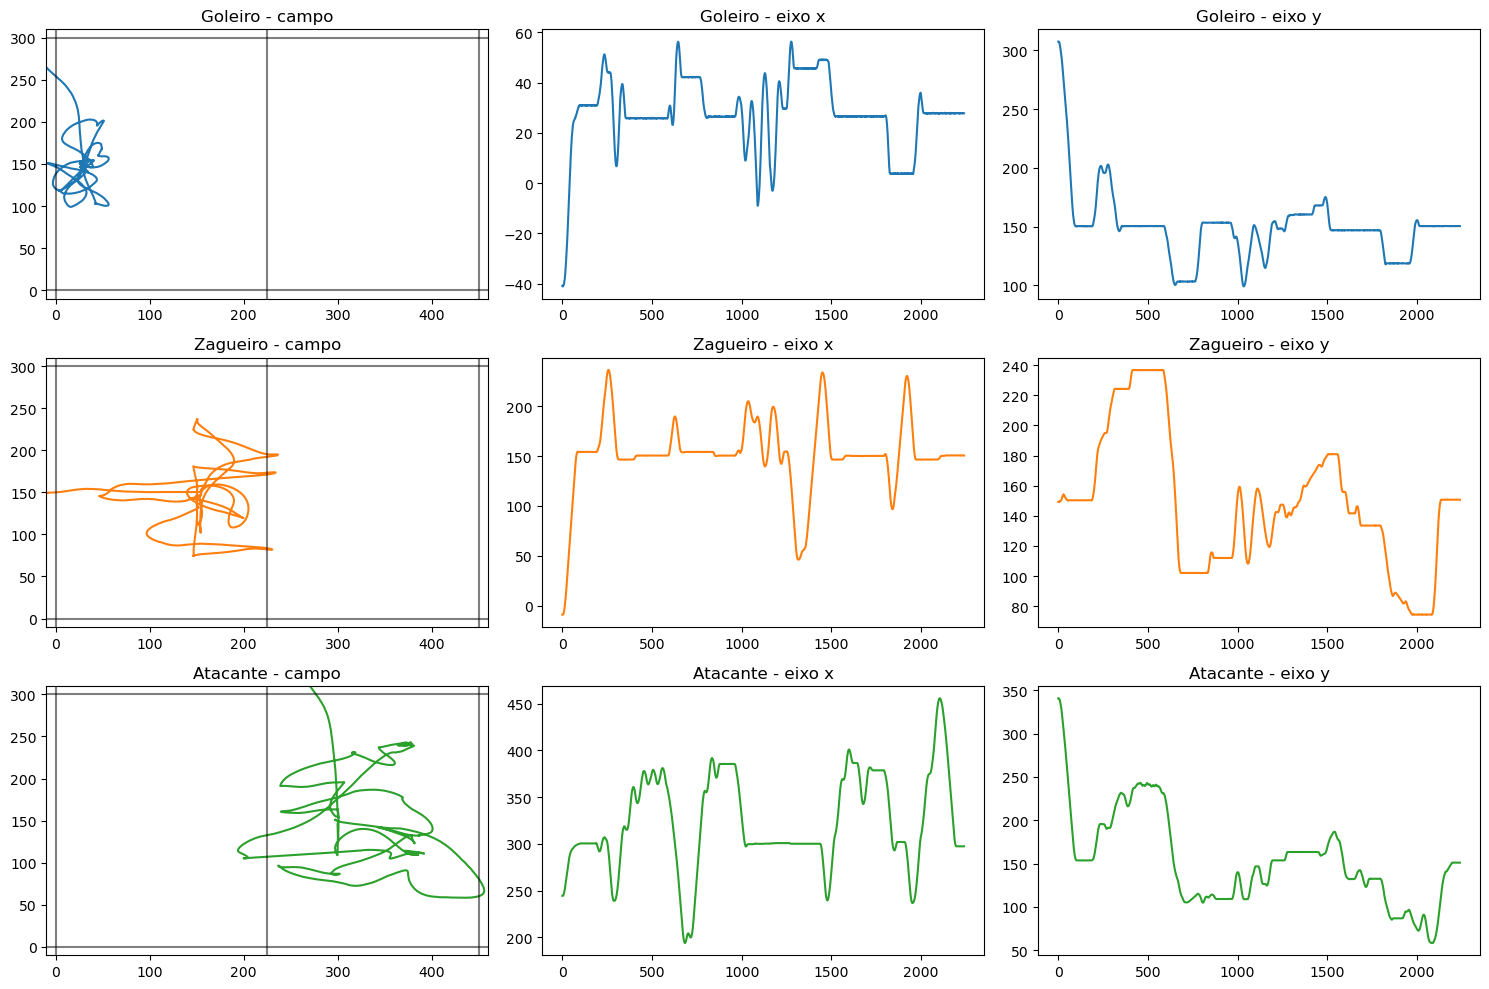

In [95]:
filename = 'dados_simulador3.txt'

data = np.loadtxt(filename)

frame_numbers, robot_id, measurements, filtered = data[:, 0], data[:, 1], data[:, 2:4], data[:, 4:]

plot_robots_positions(robot_id, measurements)

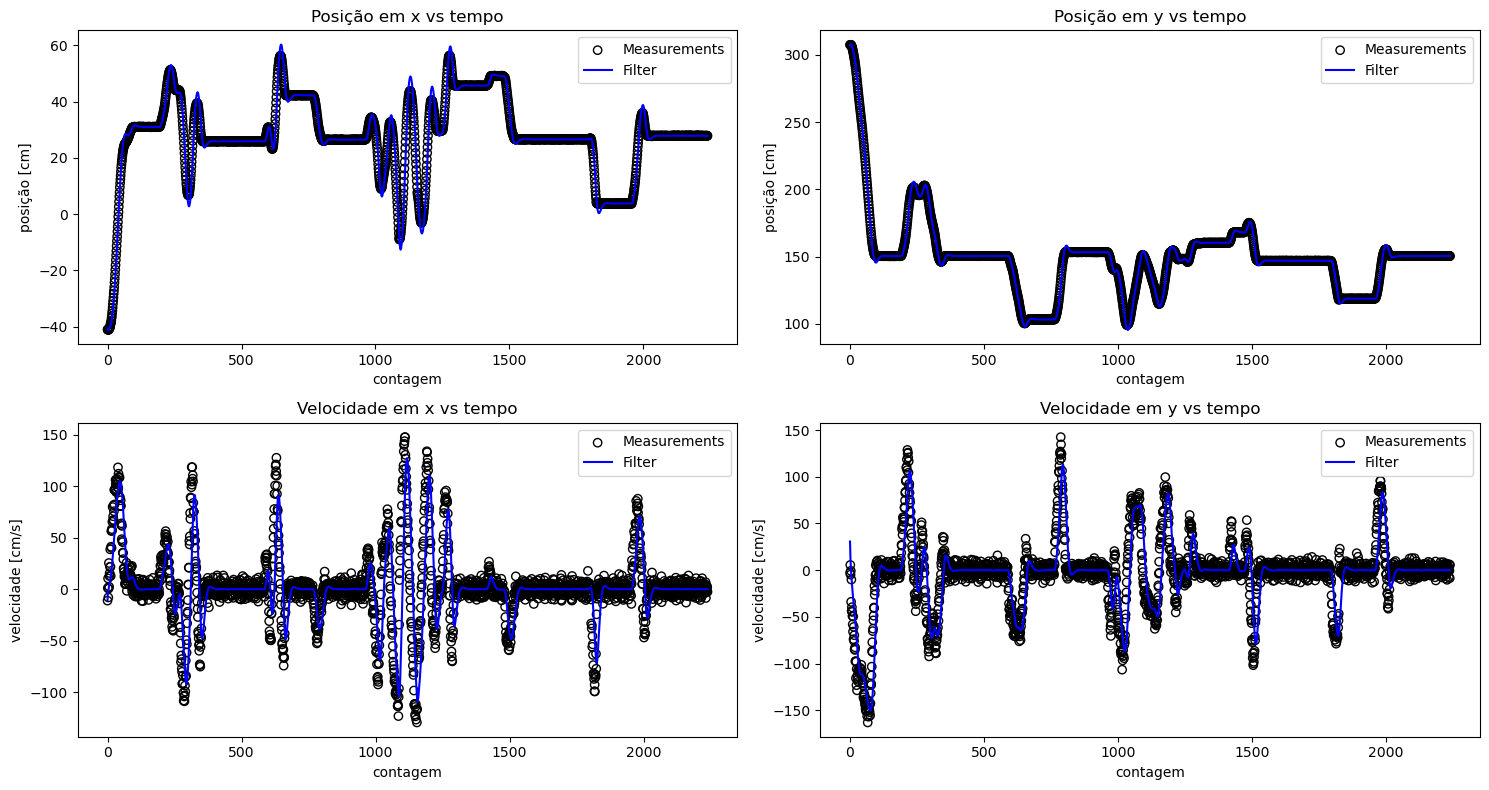

In [ ]:
plot_data2(measurements[robot_id == 0], filtered[robot_id == 0])

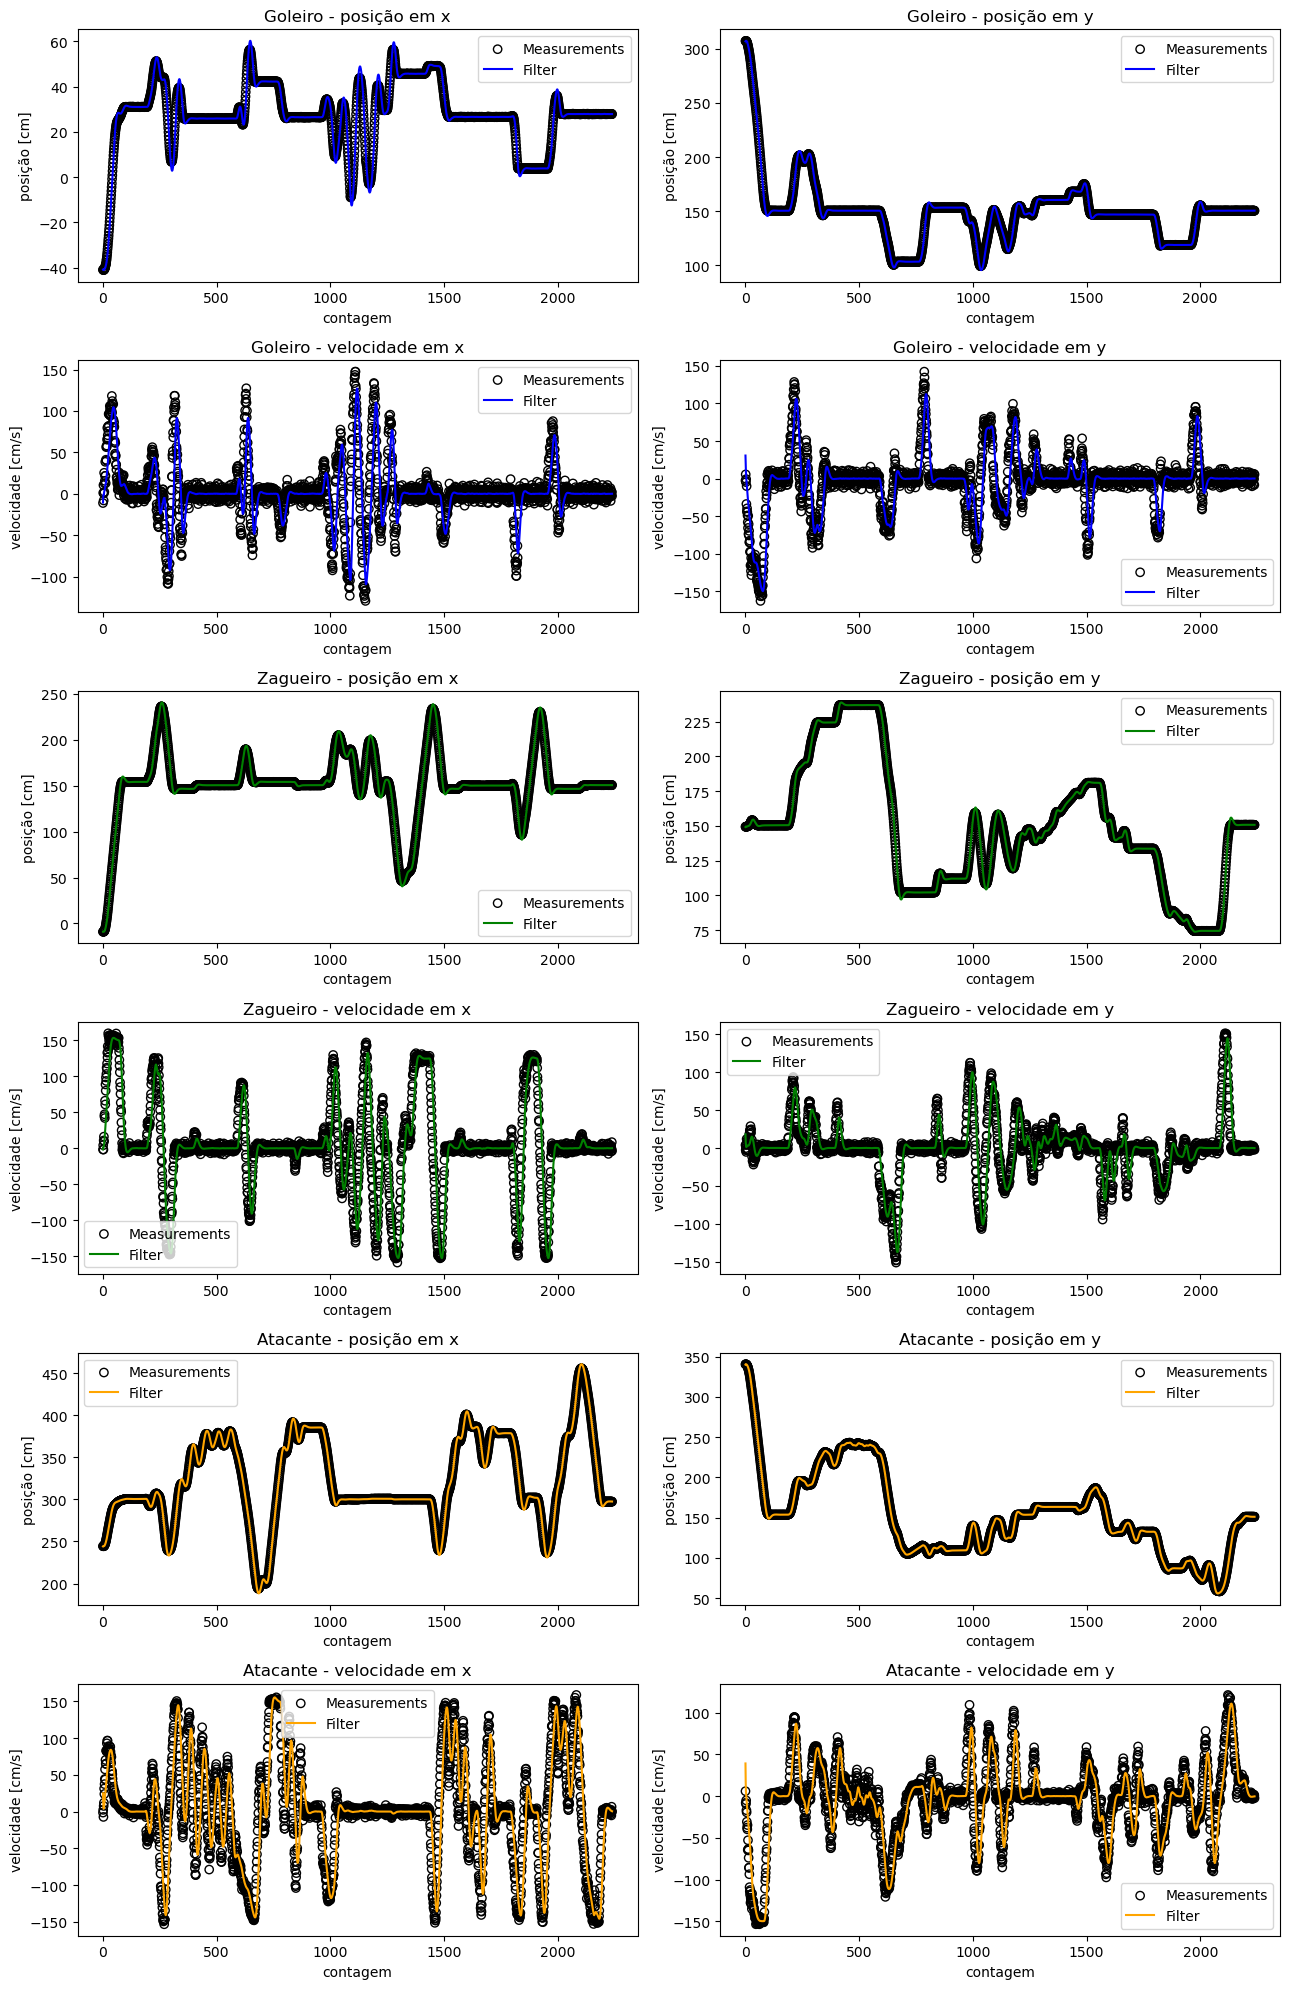

In [124]:
plot_data3(robot_id, measurements, filtered)

# Exercicíos

1. Execute o código, grave os dados da simulação dos robôs e analise as informações gravadas, para isso, utilize as funções apresentadas nesse notebook e no [Google Colab](https://colab.research.google.com/drive/12oUrfOHsb3dom9MMItDyPH3yCjKrcjkg#scrollTo=6Dq4vz_4lAhG). Quais as principais diferenças entre os dados gerados artificialmente e os dados reais?

2. Grave um novo conjunto de dados de forma semelhante ao que foi feito anteriormente, mas, dessa vez, descomente as linhas 166 a 171 do arquivo `main.py`. Aplique o filtro de Kalman sobre essas novas informações e analise os resultados, para isso, utilize as funções apresentadas nesse notebook e no [Google Colab](https://colab.research.google.com/drive/12oUrfOHsb3dom9MMItDyPH3yCjKrcjkg#scrollTo=6Dq4vz_4lAhG). Há alguma diferença entre essa análise e aquela feita nos caminhos artificiais do Colab? O que pode ser feito para melhorar a análise dos dados da simulação?